In [1]:
# pip install celluloid

In [2]:
from celluloid import Camera
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# from PIL import Image
import cv2
import os

In [15]:
p1='yg_recovery.csv'
p2='gs_recovery.csv'
p3='acc_recovery.csv'
file_name='ACC-Wind_Farm'
df=pd.read_csv(p3)
df.head(3)

,ID,x,y,1,2,3,4,5,6,7,...,175,176,177,178,179,180,181,182,183,184
0,1,520650,4048890,0.276242,0.275929,0.275617,0.275305,0.274993,0.274682,0.274370,...,0.311909,0.312537,0.313164,0.313792,0.314419,0.315047,0.315674,0.316301,0.316928,0.317555
1,2,520680,4048890,0.271273,0.271412,0.271552,0.271692,0.271831,0.271971,0.272110,...,0.312830,0.313175,0.313521,0.313867,0.314212,0.314558,0.314904,0.315250,0.315596,0.315941
2,3,520620,4048860,0.287765,0.287581,0.287398,0.287214,0.287030,0.286841,0.286651,...,0.329627,0.330136,0.330623,0.331108,0.331593,0.332079,0.332549,0.333019,0.333489,0.333959


In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np

# # Generate some sample data
# x =df['x']
# y = df['y']
# colors = df[f'{1}']

# # Create figure and scatter plot
# fig, ax = plt.subplots()
# sc = ax.scatter(x, y, c=colors, cmap='viridis')
# # Add color bar
# cbar = plt.colorbar(sc,ax=ax)
# cbar.set_label('NDVI')
# ax.legend([f'Time-{i+1}'],markerscale=0,frameon=False,loc="upper right")

# # Define update function for animation
# def update(ss):
#     # Generate new data
#     for i in range(10):
#       new_colors = df[f'{i+1}']
    
#       # Update scatter plot
#       sc.set_array(new_colors)
      
#     # Return scatter plot
#     return sc,

# # Create animation
# ani = animation.FuncAnimation(fig, update, frames=range(100), interval=100)

# # Save animation as video
# ani.save('scatter_plot_video.mp4')

# # Display the plot (optional)
# plt.show()


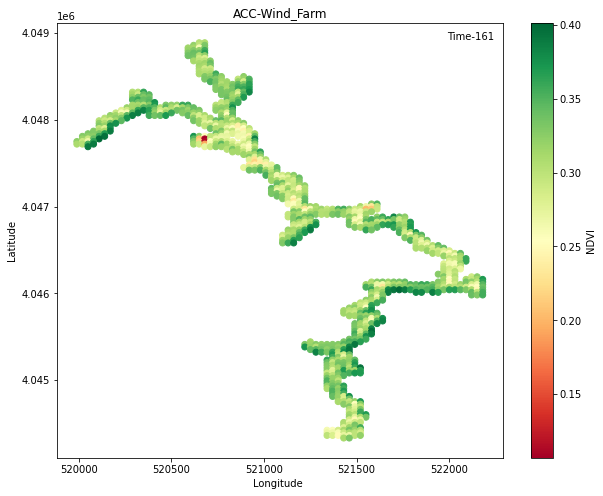

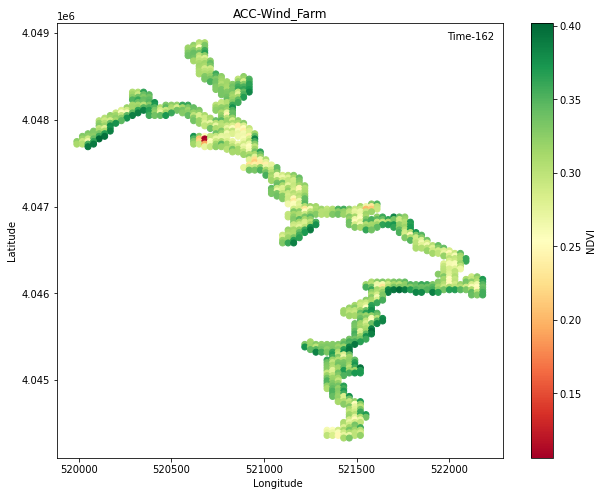

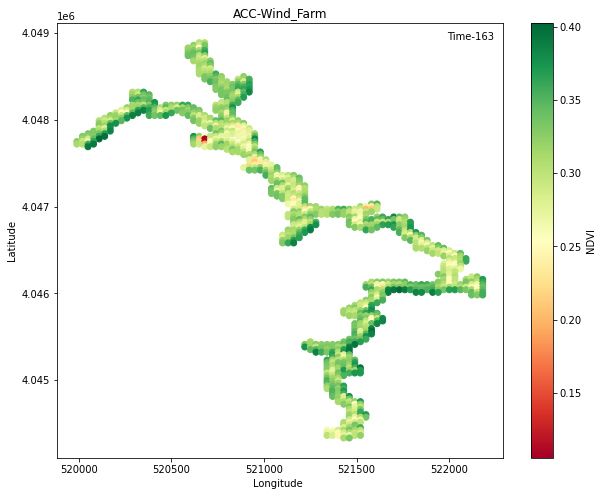

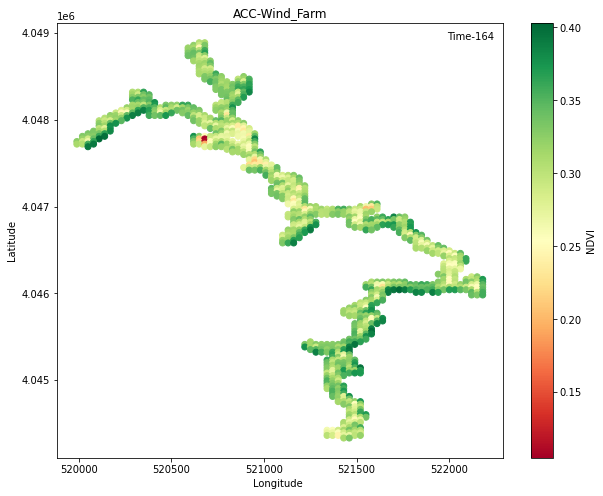

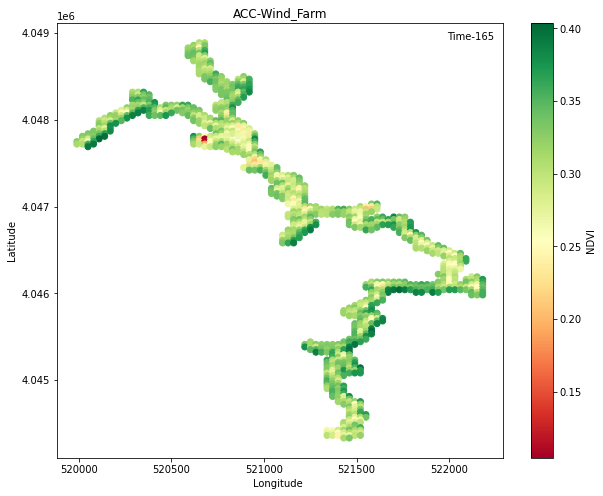

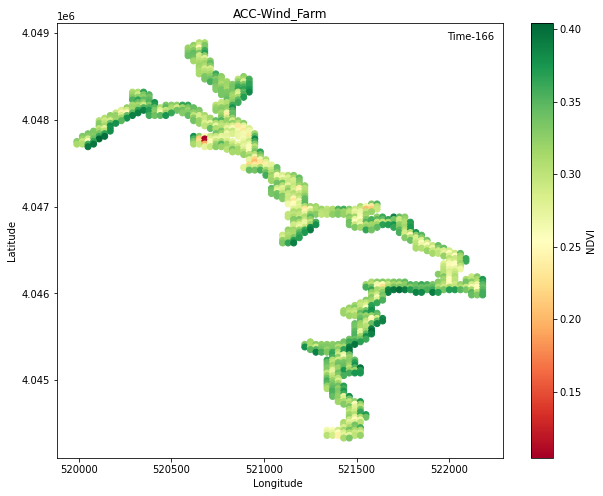

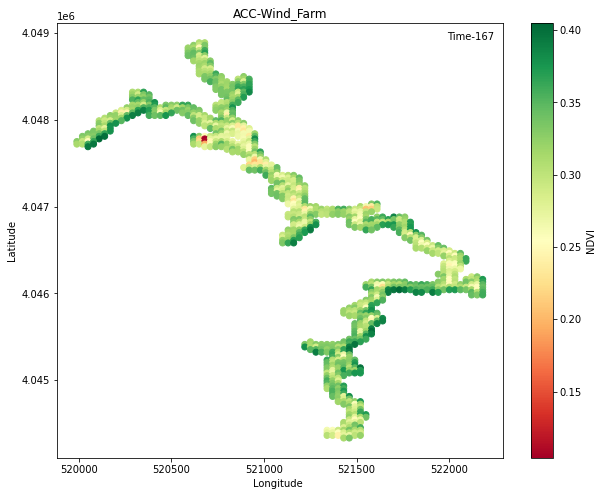

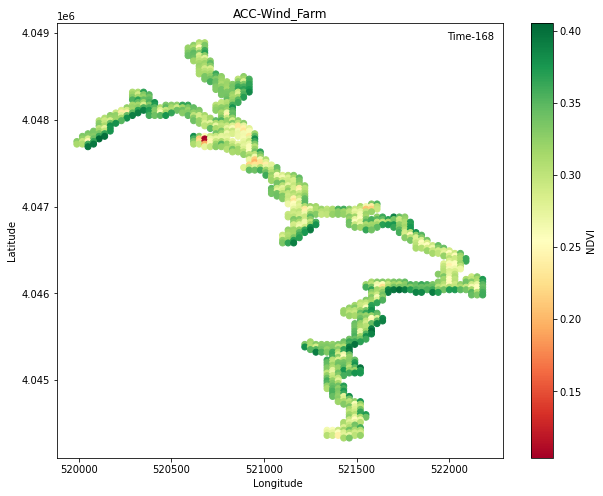

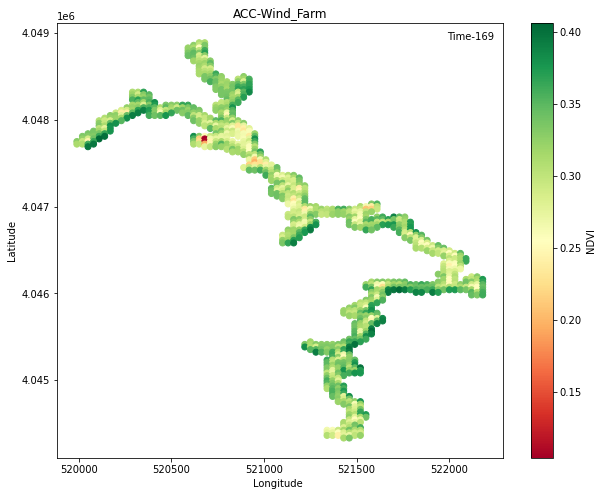

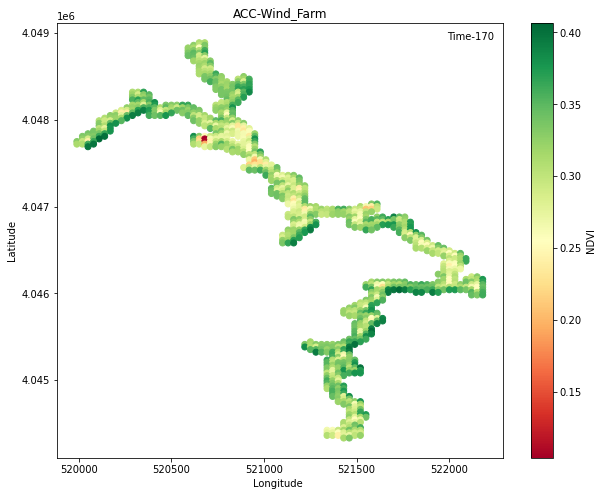

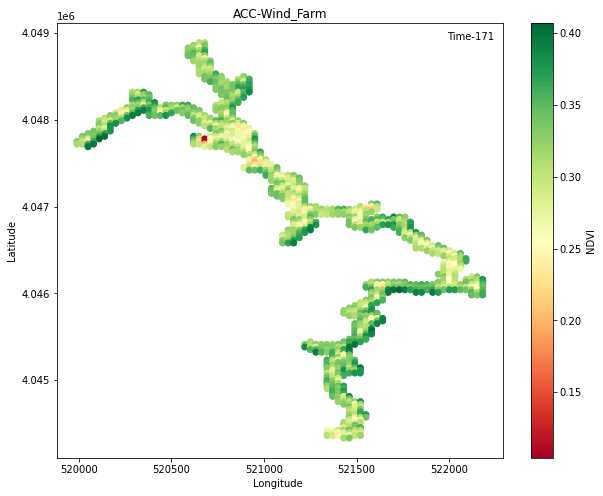

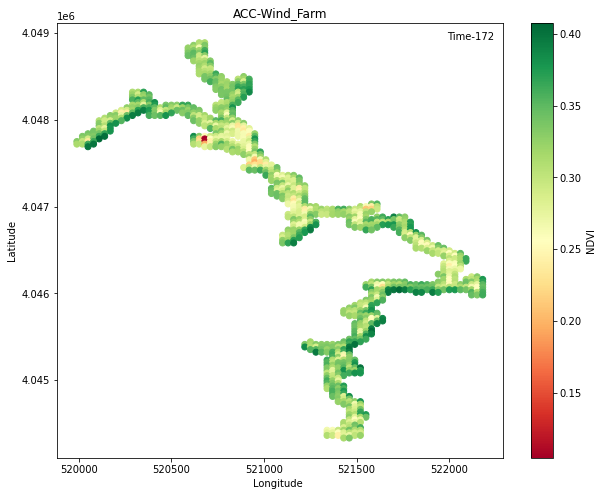

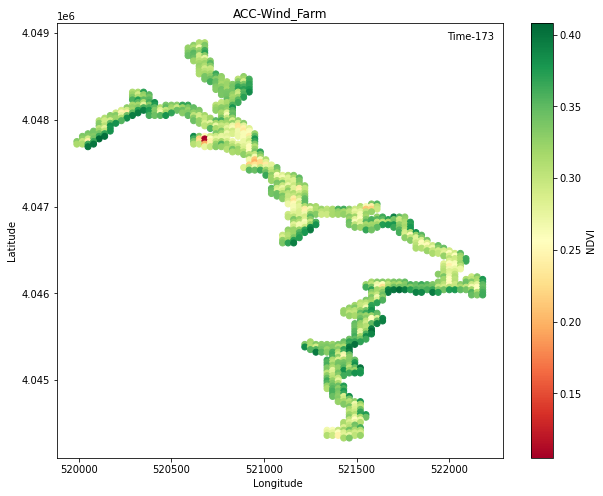

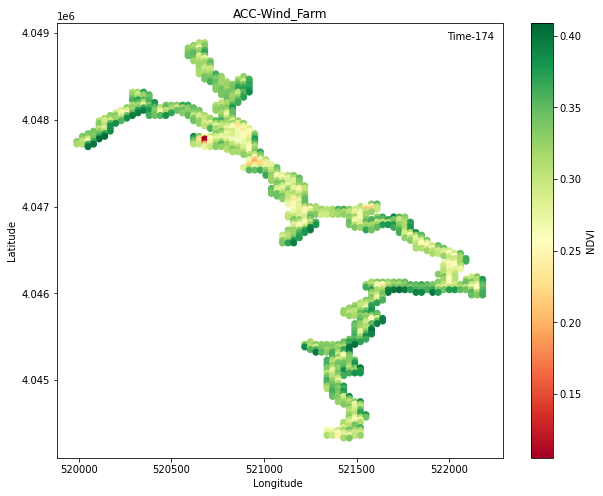

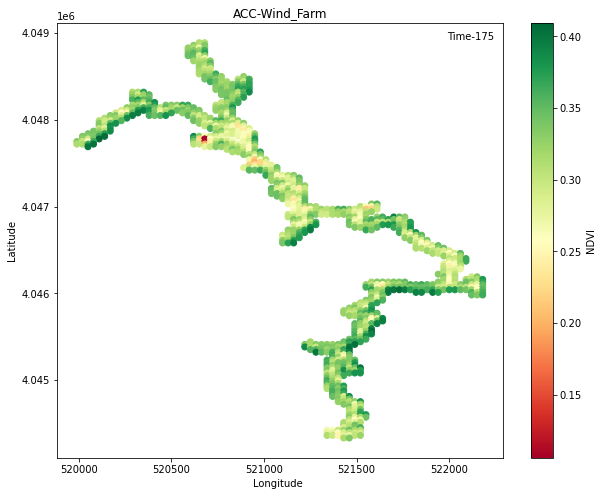

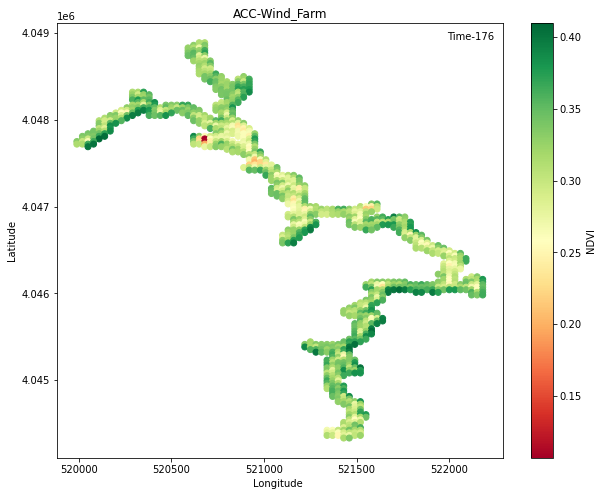

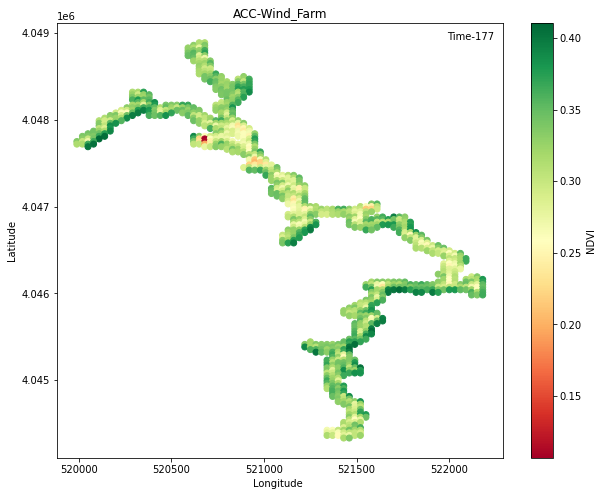

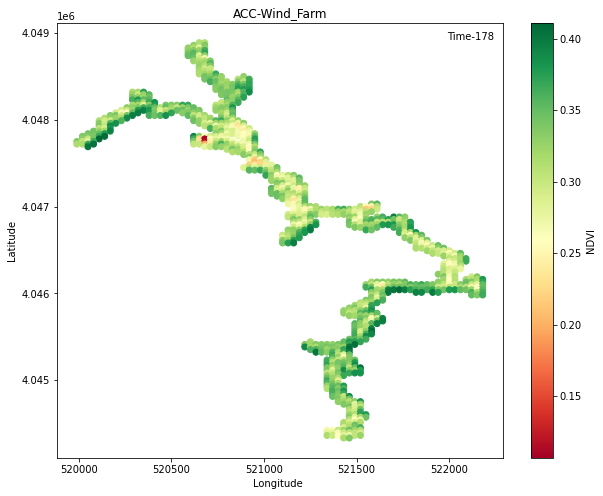

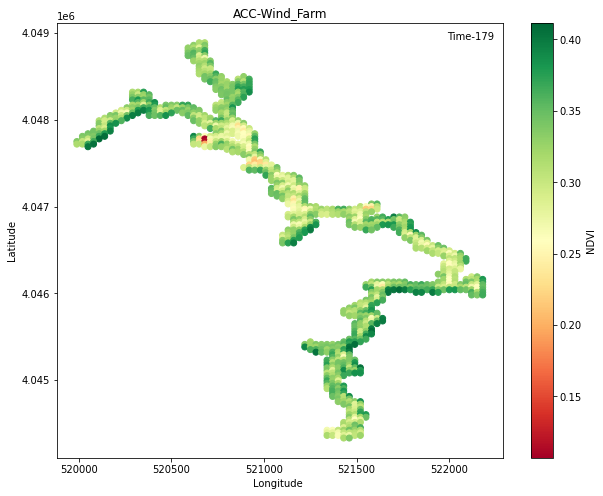

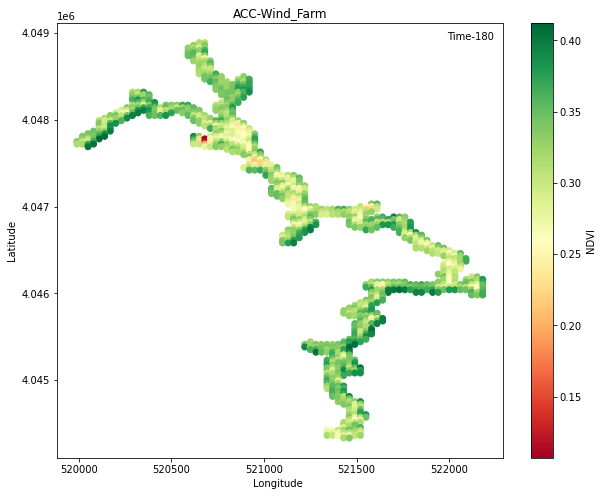

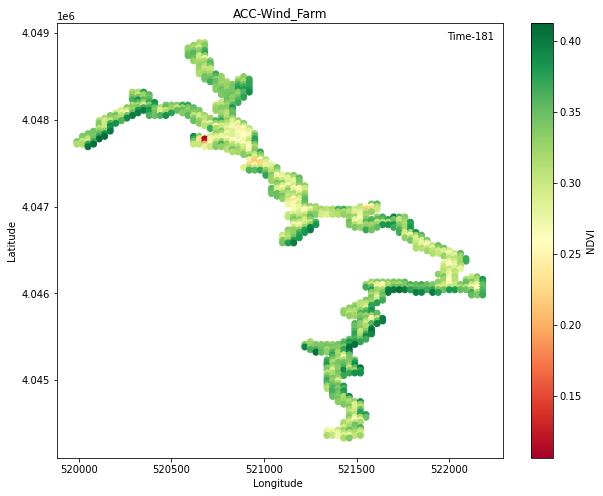

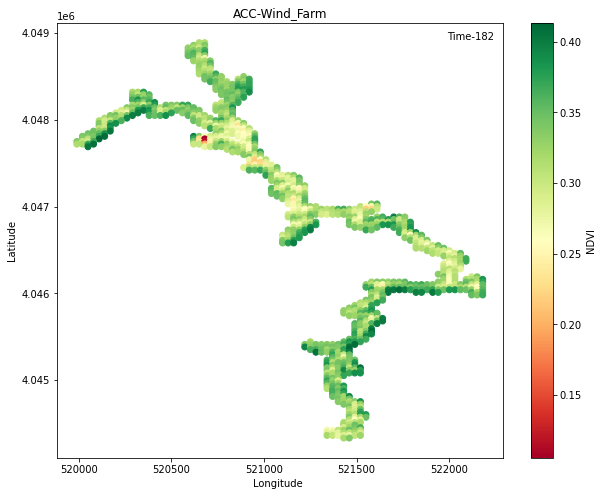

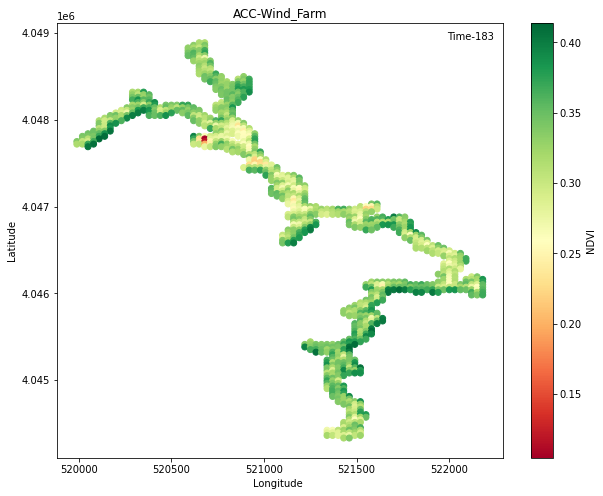

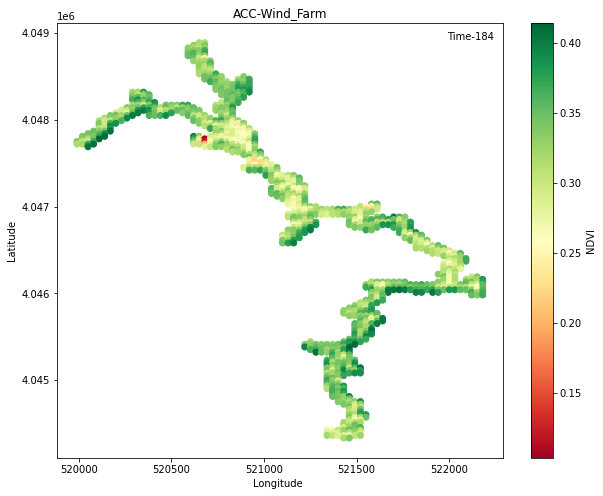

In [16]:
# Create figure with one row and two columns
figs=[]     # latter this figs will be used without saving .png file
for i in range(184):
  fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
  sc=ax.scatter(df['x'],df['y'], c=df[f'{i+1}'], cmap='RdYlGn')
  cbar = fig.colorbar(sc, ax=ax)
  cbar.set_label('NDVI')
  ax.set_xlabel('Longitude ')
  ax.set_ylabel('Latitude')
  ax.set_title(file_name)
  ax.legend([f'Time-{i+1}'],markerscale=0,frameon=False,loc="upper right")
  # ff=plt.gcf()
  plt.savefig(f"{i+1}.png",dpi=300 )
  # figs.append(ff)


In [17]:
# Set the directory containing the images
directory = os.getcwd()

# Get the list of image file names
fls = sorted([f for f in os.listdir(directory) if f.endswith('.png')],reverse=True)
files=[]
for i in range(len(fls)):
  files.append(f'{i+1}.png')
# # Define a key function to extract the numeric part of the file name using split function
# def get_number(filename):
#     return int(filename.split('.')[0])
# Set the output video file name
video_name = f'{file_name}.mp4'

# Set the frame rate (number of frames per second)
fps = 30

# Set the size of the output video (width, height)
size = (1280, 720)

# Create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_name, fourcc, fps, size)

# Loop over the image files and add them to the video
for file in files:
    # Read the image file
    img = cv2.imread(os.path.join(directory, file))

    # Resize the image to match the size of the video
    img = cv2.resize(img, size)

    # Write the image to the video
    video.write(img)

# Release the video writer and close the video file
video.release()


In [8]:
# display video 
from IPython.display import HTML
from base64 import b64encode

# Set the path to the video file
video_path = f'/content/{file_name}.mp4'

# Encode the video file as a base64 string
video_file = open(video_path, "rb").read()
video_url = "data:video/mp4;base64," + b64encode(video_file).decode()

# Display the video in the notebook
HTML(f'<video width=500 controls><source src="{video_url}"></video>')


In [13]:
######### remove all png files 
import os

# Get the current working directory
cwd = os.getcwd()

# Remove all .png files in the directory
for file in os.listdir(cwd):
    if file.endswith('.png'):
        os.remove(os.path.join(cwd, file))
    if file.endswith('.mp4'):
      os.remove(os.path.join(cwd, file))



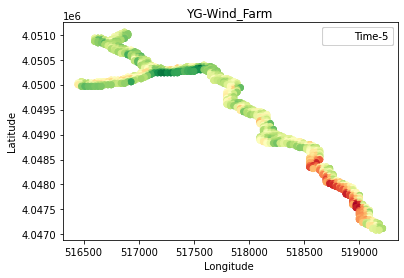

In [26]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(5):
    t = plt.scatter(df['x'],df['y'], c=df[f'{i+1}'], cmap='RdYlGn')
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label('NDVI')
    plt.title(file_name)
    plt.xlabel('Longitude ')
    plt.ylabel('Latitude')
    plt.legend( [f'Time-{i+1}'],markerscale=0)
    camera.snap()
animation = camera.animate()
plt.show()
animation.save(f'{file_name}_camera.mp4')  

## Below codes are need to be updated and revised 

In [173]:
# Define the animation function
num_frames = len(figs)
def animate(i):
    fig = figs[i]
    return fig

# Create the animation object
ani = animation.FuncAnimation(plt.gcf(), animate, frames=num_frames, interval=100)

# Save the animation to a video file
Writer = animation.writers['ffmpeg']
writer = Writer(fps=5, metadata=dict(artist='Me'), bitrate=1800)
ani.save('scatter.mp4', writer=writer)

# Display the animation in a window
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
#     https://pypi.org/project/celluloid/
fig,ax= plt.subplots(1, sharex=True, sharey=True)
camera = Camera(fig)
file_name='YG-Wind Farm'
for i in range(10): 
    # plt.clf() 
    aa=plt.scatter(df['x'],df['y'],c=df[f'{i+1}'],cmap='RdYlGn');plt.colorbar()
    ax.title(file_name)
    ax.xlabel("Longitude")
    ax.ylabel('Latitude')
    ax.legend([f'Time-{i+1}'],markerscale=0,frameon=False,loc="upper right")
    # plt.text(0.5, 1.01, f'Time:{i+1}')
    # plt.legend(markerscale=0,fancybox=False,frameon=False)
    # plt.colorbar()
    plt.show()
    # images.append(aa)
    camera.snap()
animation = camera.animate(interval = 40, repeat = True, repeat_delay = 500,blit=True)
animation.save(f'{file_name}.mp4')   

In [66]:
from IPython.display import HTML
# Inline display
HTML(anim.to_html5_video())


array(<matplotlib.collections.PathCollection object at 0x7f3c652f9340>,
      dtype=object)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(images[1])

In [89]:
from IPython.display import HTML
# Inline display
HTML(animation.to_html5_video())

In [14]:
animation = camera.animate(interval = 40, repeat = True, repeat_delay = 500,blit=True)
animation.save(f'{file_name}.gif', writer = 'mencoder', fps=60)